# Gaussian NB Part

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.feature_selection import SelectKBest,f_classif

from mlxtend.plotting import plot_decision_regions
from seaborn import load_dataset, pairplot
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import category_scatter
from sklearn.preprocessing import StandardScaler    
from matplotlib.colors import ListedColormap  
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

Loading Data

In [34]:
data = load_wine()

In [3]:
# print the names of the 13 features
print ("Features: ", data.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", data.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [4]:
data.data.shape

(178, 13)

Spliting Data

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3,random_state=1) # 70% training and 30% test

In [6]:
#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

Getting Accuracy

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


Classification Report


Confusion Matrix:

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


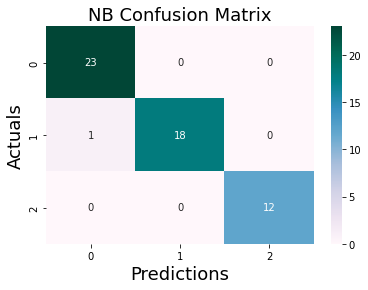

              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        23
     class_1       1.00      0.95      0.97        19
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [8]:
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('NB Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test,y_pred , target_names=data.target_names))


In [9]:
our_data=pd.DataFrame(data.data)
our_target=pd.DataFrame(data.target)


Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

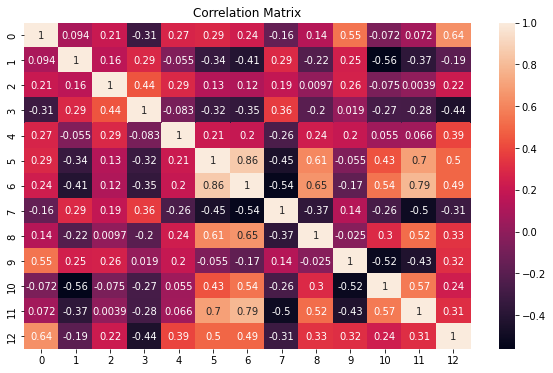

In [10]:
cor = our_data.corr()

plt.figure(figsize= (10,6))
sns.heatmap(cor, annot = True)
plt.title("Correlation Matrix")


['x6' 'x12']
accuracies :[135.07762424  36.94342496  13.3129012   35.77163741  12.42958434
  93.73300962 233.92587268  27.57541715  30.27138317 120.66401844
 101.31679539 189.97232058 207.9203739 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


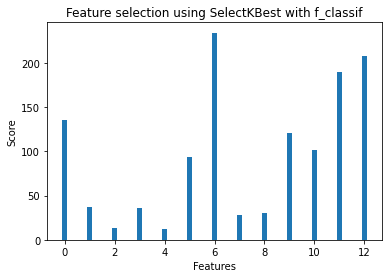

In [11]:
featureSelection= SelectKBest(f_classif, k=2).fit(our_data, our_target)
X_train = featureSelection.transform(our_data)
print(featureSelection.get_feature_names_out())
featureSelection.scores_
col_names =our_data.columns
print(f"accuracies :{featureSelection.scores_}")
plt.bar(col_names , featureSelection.scores_, width=0.2)
plt.title("Feature selection using SelectKBest with f_classif")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [12]:
our_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
data_train=pd.DataFrame({'flavanoids':our_data[6],'proline':our_data[12]})
data_train

,flavanoids,proline
0,3.06,1065.0
1,2.76,1050.0
2,3.24,1185.0
3,3.49,1480.0
4,2.69,735.0
...,...,...
173,0.61,740.0
174,0.75,750.0
175,0.69,835.0
176,0.68,840.0


In [14]:
# Split dataset into training set and test set
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(data_train,our_target, test_size=0.3,random_state=1) # 70% training and 30% test

In [15]:
X_TRAIN

,flavanoids,proline
90,1.50,480.0
95,2.27,937.0
28,2.97,915.0
124,3.03,380.0
135,0.66,695.0
...,...,...
133,1.20,600.0
137,0.60,515.0
72,1.84,472.0
140,0.50,600.0


In [16]:
#Create a Gaussian Classifier
m = GaussianNB()

#Train the model using the training sets
m.fit(X_TRAIN.to_numpy(), y_TRAIN.to_numpy())

#Predict the response for test dataset
y_Pred = m.predict(X_TEST)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_TEST, y_Pred ))

Accuracy: 0.8888888888888888



Confusion Matrix:

[[22  1  0]
 [ 1 16  2]
 [ 0  2 10]]


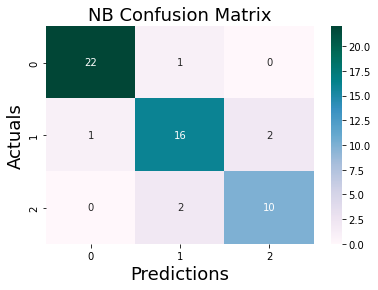

              precision    recall  f1-score   support

     class_0       0.96      0.96      0.96        23
     class_1       0.84      0.84      0.84        19
     class_2       0.83      0.83      0.83        12

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



In [18]:
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_TEST, y_Pred))
ax = sns.heatmap(confusion_matrix(y_TEST,y_Pred ), annot=True, cmap='PuBuGn')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('NB Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_TEST,y_Pred , target_names=data.target_names))

In [19]:
# this function can be used to plot the decision boundary
def plotDecisionBoundary( X, y, model, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)

Text(0, 0.5, 'proline')

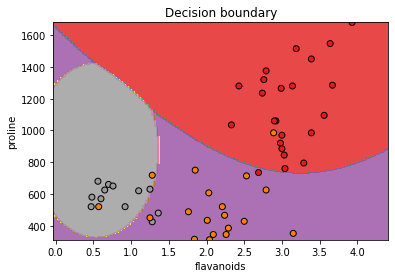

In [20]:
# plot the decision boundary 
plotDecisionBoundary(X_TEST.to_numpy(),y_TEST.to_numpy(),model=m,title='Decision boundary')
plt.xlabel('flavanoids')
plt.ylabel('proline')


# KNN part

# Read The data


In [21]:
!pip install matplotlib
# !python -m pip uninstall matplotlib
# !pip install  matplotlib==3.13


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [23]:
# upload datasets
file = files.upload()
#read datasets
df_original = pd.read_csv('car.csv',header=None)

Saving car.csv to car.csv


In [24]:
print(df_original.head(10))
print(len(df_original))


       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc
5  vhigh  vhigh  2  2    med  high  unacc
6  vhigh  vhigh  2  2    big   low  unacc
7  vhigh  vhigh  2  2    big   med  unacc
8  vhigh  vhigh  2  2    big  high  unacc
9  vhigh  vhigh  2  4  small   low  unacc
1728


# (b) Since some attributes are represented by string values. If we choose a distance
metric like Euclidean distance, we need to transform the string values into numbers. Use python to implement this preprocessing step.

In [25]:
ordinal_encoder = OrdinalEncoder(dtype = np.uint8)
encoded_data_np = ordinal_encoder.fit_transform(df_original)
encoded_data_np

array([[3, 3, 0, ..., 2, 1, 2],
       [3, 3, 0, ..., 2, 2, 2],
       [3, 3, 0, ..., 2, 0, 2],
       ...,
       [1, 1, 3, ..., 0, 1, 2],
       [1, 1, 3, ..., 0, 2, 1],
       [1, 1, 3, ..., 0, 0, 3]], dtype=uint8)

# (a) 1728 samples in total. shuffle the dataset and split the dataset into 
training =1000 samples,
validation = 300 samples,
testing = 428 samples.

In [26]:

df = pd.DataFrame(encoded_data_np)
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:,:-1], df.iloc[:,-1], train_size=1300 ,test_size=428, random_state=42)
X_train, X_val = X_train.iloc[:1000], X_train.iloc[1000:]
y_train, y_val = y_train.iloc[:1000], y_train.iloc[1000:]
df.head(10)

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


# (c) Try to use different number of training samples to show the impact of number of training samples.
Use 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90% and 100%
of the training set for 10 separate KNN classifiers and show their performance
(accuracy score) on the validation set and testing set. You can specify a fixed
K=2 value (nearest neighbor) in this question. Notably, X axis is the portion of
the training set, Y axis should be the accuracy score. There should be two lines
in total, one is for the validation set and another is for the testing set.

In [27]:

KNN_model = KNeighborsClassifier(n_neighbors=2)
x_axes = []
val_scores = []
test_scores = []
for i in range(100,1001,100):
  x_axes.append(i//10)
  X_train_current = X_train.iloc[:i]
  y_train_current = y_train.iloc[:i]
  KNN_model.fit(X_train_current,y_train_current)
  # get the score for the validation data
  y_val_pred = KNN_model.predict(X_val)
  validation_score = accuracy_score(y_val,y_val_pred)
  val_scores.append(validation_score)

  # get the score for the test data
  y_test_pred = KNN_model.predict(X_test)
  test_score = accuracy_score(y_test, y_test_pred)
  test_scores.append(test_score)


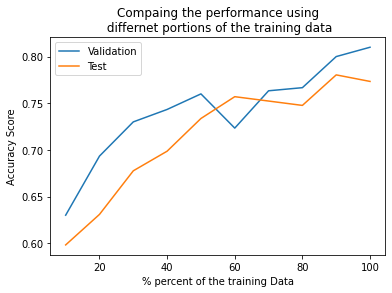

In [28]:
plt.plot(x_axes, val_scores, label = "Validation" )
plt.plot(x_axes, test_scores, label = "Test" )
plt.title("Compaing the performance using\n differnet portions of the training data")
plt.xlabel("% percent of the training Data")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

# (d) Use 100% of training samples, try to find the best K value, and show the accuracy curve on the validation set when K varies from 1 to 10.

In [29]:
scores=[]
x_axes =[]
for i in range(1,11,1):
  x_axes.append(i)
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,y_train)
  y_val_pred = KNN.predict(X_val)
  score = accuracy_score(y_val,y_val_pred)
  scores.append(score)
print("scores = ",scores)

scores =  [0.82, 0.81, 0.8633333333333333, 0.87, 0.8866666666666667, 0.8766666666666667, 0.9, 0.8666666666666667, 0.8266666666666667, 0.84]


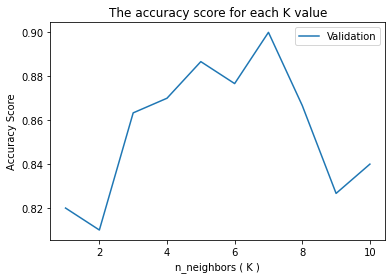

In [30]:
plt.plot(x_axes, scores, label = "Validation" )
plt.title("The accuracy score for each K value")
plt.xlabel("n_neighbors ( K )")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

# (e) Analysis the training time when use different number of training samples. Consider the following 4 cases:
• 10% of the whole training set and K = 2<br>
• 100% of the whole training set and K = 2<br>
• 10% of the whole training set and K = 10<br>
• 100% of the whole training set and K = 10.<br>
Plot a bar chart figure to show the prediction time on the testing set.

In [31]:
# when k = 2
KNN_2 = KNeighborsClassifier(n_neighbors=2)
# 10 % 
X_train_current = X_train.iloc[:100]
y_train_current = y_train.iloc[:100]
start = time.time()
KNN_2.fit(X_train_current, y_train_current)
end = time.time()
train_time_10_2 = end - start
# predict time
start = time.time()
y_pred = KNN_2.predict(X_test)
end = time.time()
test_time_10_2 = end - start

# 100 % 
X_train_current = X_train
y_train_current = y_train
start = time.time()
KNN_2.fit(X_train_current, y_train_current)
end = time.time()
train_time_100_2 = end - start
# predict time
start = time.time()
y_pred = KNN_2.predict(X_test)
end = time.time()
test_time_100_2 = end - start

# when k = 10
KNN_10 = KNeighborsClassifier(n_neighbors=10)
# 10 % 
X_train_current = X_train.iloc[:100]
y_train_current = y_train.iloc[:100]
start = time.time()
KNN_10.fit(X_train_current, y_train_current)
end = time.time()
train_time_10_10 = end - start
# predict time
start = time.time()
y_pred = KNN_10.predict(X_test)
end = time.time()
test_time_10_10 = end - start

# 100 % 
X_train_current = X_train
y_train_current = y_train
start = time.time()
KNN_10.fit(X_train_current, y_train_current)
end = time.time()
train_time_100_10 = end - start
# predict time
start = time.time()
y_pred = KNN_10.predict(X_test)
end = time.time()
test_time_100_10 = end - start

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


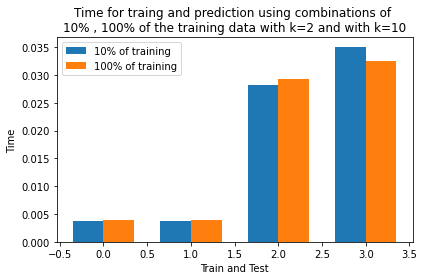

In [32]:
x_axes_labels = ['Train k=2', 'Train k=10', 'Test k=2', 'Test k=10']
time_10_percent = [train_time_10_2, train_time_10_10, test_time_10_2, test_time_10_10]
time_100_percent = [train_time_100_2, train_time_100_10 , test_time_100_2, test_time_100_10]
x = np.arange(len(x_axes_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time_10_percent, width, label='10% of training')
rects2 = ax.bar(x + width/2, time_100_percent, width, label='100% of training')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_xlabel('Train and Test')
ax.set_title('Time for traing and prediction using combinations of \n10% , 100% of the training data with k=2 and with k=10')
ax.set_xticks(x, x_axes_labels )
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()